##🩸Diagnóstico de Doenças Hepáticas (Fígado)

O Indian Liver Patient Dataset (ILPD) é um conjunto de dados popular para classificação binária (diagnóstico de doença hepática). Ele contém 583 registros e 10 atributos (colunas) mais a variável-alvo (Dataset), que indica se o paciente tem ou não doença hepática.

📊 Descrição dos Atributos
1. Age:	Numérico - Idade do paciente (em anos)
2. Gender: Categórico - Sexo do paciente (Male / Female);
3. Total_Bilirubin:	Numérico - Nível total de bilirrubina no sangue (mg/dL);
4. Direct_Bilirubin:	Numérico - Fração direta (conjugada) da bilirrubina (mg/dL);
5. Alkaline_Phosphotase:	Numérico - Fosfatase alcalina (U/L) – enzima associada a função hepática;
6. Alamine_Aminotransferase:	Numérico - ALT (U/L) – enzima que indica inflamação hepática;
7. Aspartate_Aminotransferase:	Numérico - AST (U/L) – enzima liberada por lesão hepática;
8. Total_Proteins:	Numérico -Proteínas totais no sangue (g/dL);
9. Albumin:	Numérico - Nível de albumina no sangue (g/dL);
10. Albumin_and_Globulin_Ratio:	Numérico	- Razão entre albumina e globulina (indicador funcional hepático);
11. Dataset(target):	Numérico - 1 para pacientes com doença hepática, 2 para pacientes saudáveis;


In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

##Dados



In [123]:
df = pd.read_csv("dataset/indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [124]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [125]:
# Visualizar as informações da base de dados
print("Shape (linhas, colunas):", df.shape)
print("\nTipos de dados:\n", df.dtypes)

Shape (linhas, colunas): (583, 11)

Tipos de dados:
 Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object


In [126]:
# Substitui rótulo Dataset: 1 = doença hepática, 2 = saudável → 1 e 0
df['Target'] = (df['Dataset'] == 1).astype(int)
df.drop(columns=['Dataset'], inplace=True)

In [127]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Pré-processamento de dados 01

In [128]:
# Tratgar valor da variavel Gender (Male = 1, Female = 0)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
set(df['Gender'])

{0, 1}

In [129]:
# Tratamento dos dados nulos
print("Dados nulos:")
print(df.isnull().sum())

Dados nulos:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64


0      0.90
1      0.74
2      0.89
3      1.00
4      0.40
       ... 
578    0.37
579    1.10
580    1.00
581    1.00
582    1.50
Name: Albumin_and_Globulin_Ratio, Length: 583, dtype: float64


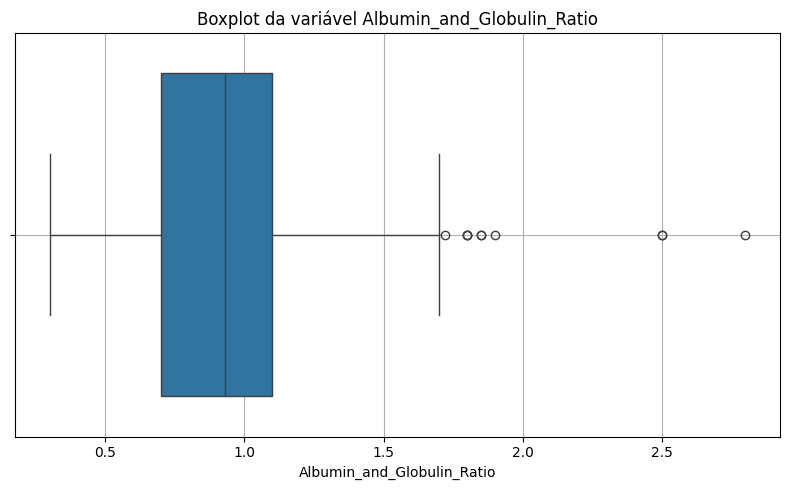

In [130]:
# Analise dos valores da variavel Albumin_and_Globulin_Ratio, para o tratamento dos valores nulos
# Boxplot para visualizar outliers em Albumin_and_Globulin_Ratio

print(df['Albumin_and_Globulin_Ratio'])

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Albumin_and_Globulin_Ratio'])
plt.title('Boxplot da variável Albumin_and_Globulin_Ratio')
plt.xlabel('Albumin_and_Globulin_Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

In [131]:
# Tratamento dos valore nulos da Albumin_and_Globulin_Ratio
# Usar a média para imputar os valores ausentes pode ser influenciado pelos outliers e puxar a média para cima.
# Nesse caso sera inputado a mediana nos valores nulos.

df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median())

In [132]:
# Validando a existencia dos valores nulos
print("Dados nulos:")
print(df.isnull().sum())

Dados nulos:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64


In [133]:
# Tratamento dos dados duplicados
print("Dados duplicados:")
print(df.duplicated().sum())

Dados duplicados:
13


In [134]:
# Remover dados duplicados
df = df.drop_duplicates()

In [135]:
print("Dados duplicados:")
print(df.duplicated().sum())

df.shape

Dados duplicados:
0


(570, 11)

##Exploração de dados

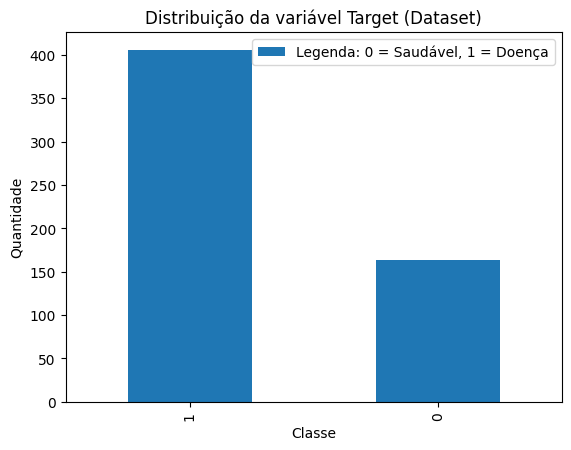

In [136]:
# Distribuição da variável Target
df['Target'].value_counts().plot(kind='bar')
plt.title("Distribuição da variável Target (Dataset)")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.legend(['Legenda: 0 = Saudável, 1 = Doença'])
plt.show()

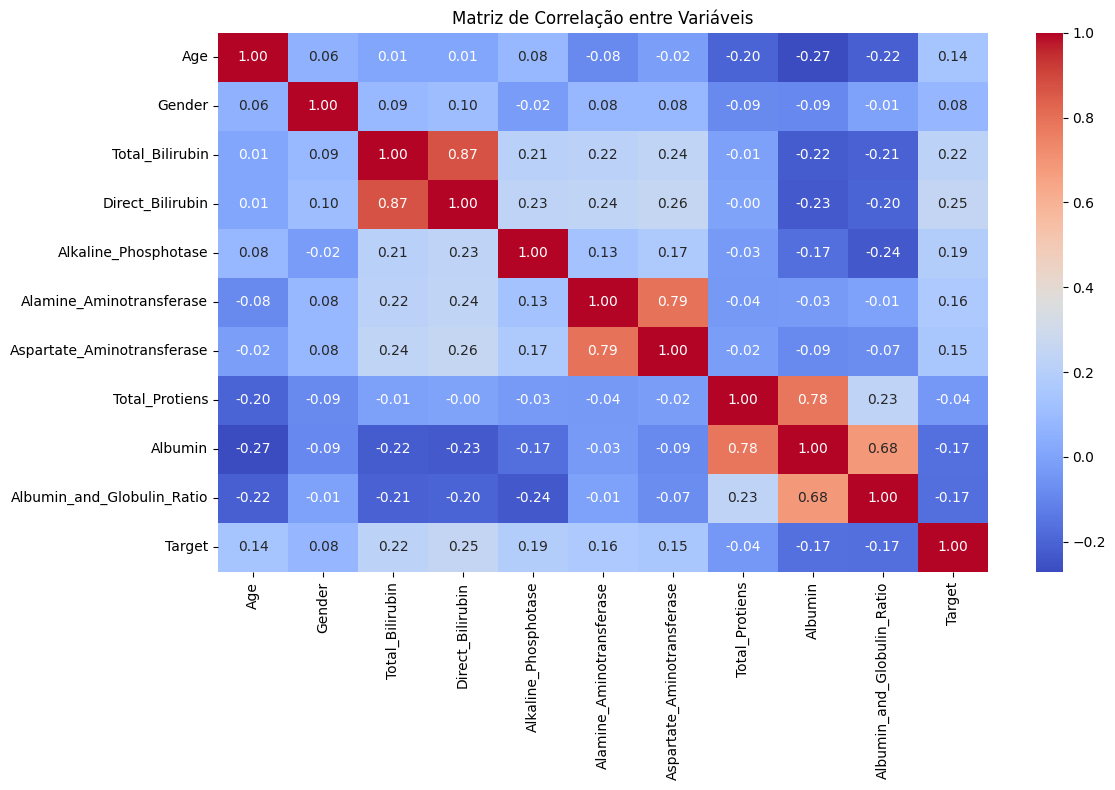

In [137]:
# Matriz de correlação
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis')
plt.tight_layout()
plt.show()

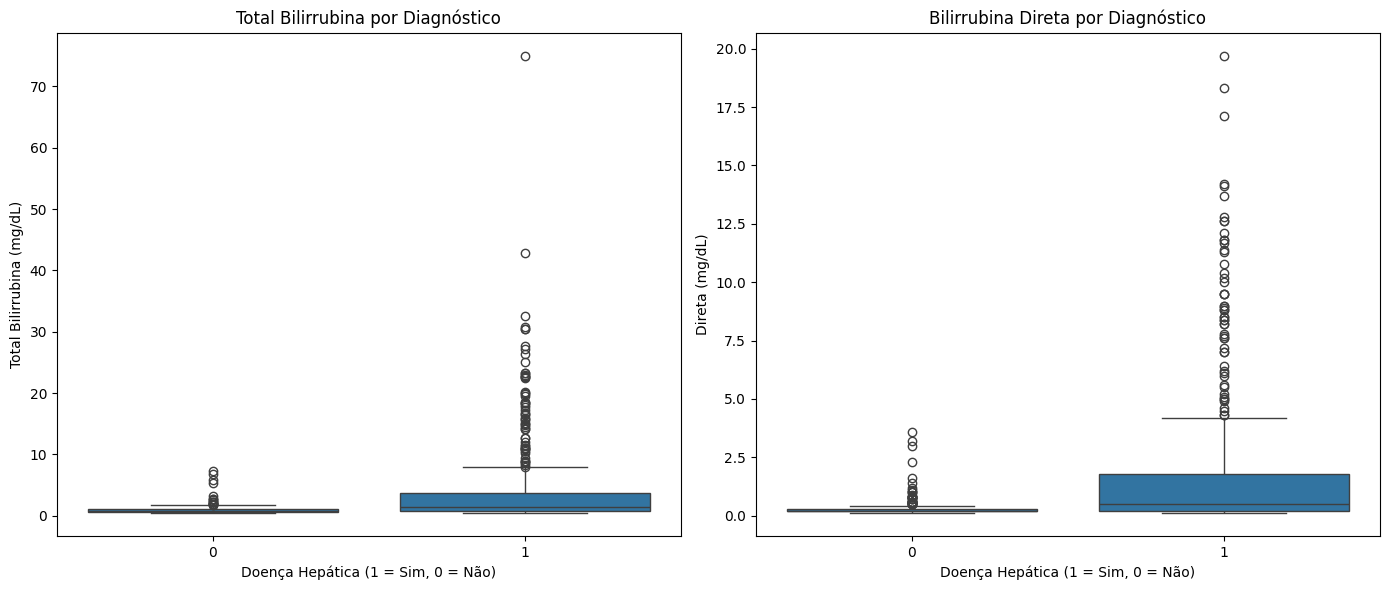

In [138]:
# Pergunta 01: Como variam os níveis de bilirrubina em pacientes com e sem doença hepática?
# Ferramenta: Boxplot por classe (Target)
# Objetivo: Comparar a distribuição de Total_Bilirubin e Direct_Bilirubin entre os grupos.

# Boxplots para análise da bilirrubina por diagnóstico

plt.figure(figsize=(14, 6))

# Total Bilirrubina
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Target', y='Total_Bilirubin')
plt.title('Total Bilirrubina por Diagnóstico')
plt.xlabel('Doença Hepática (1 = Sim, 0 = Não)')
plt.ylabel('Total Bilirrubina (mg/dL)')

# Bilirrubina Direta
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Target', y='Direct_Bilirubin')
plt.title('Bilirrubina Direta por Diagnóstico')
plt.xlabel('Doença Hepática (1 = Sim, 0 = Não)')
plt.ylabel('Direta (mg/dL)')

plt.tight_layout()
plt.show()

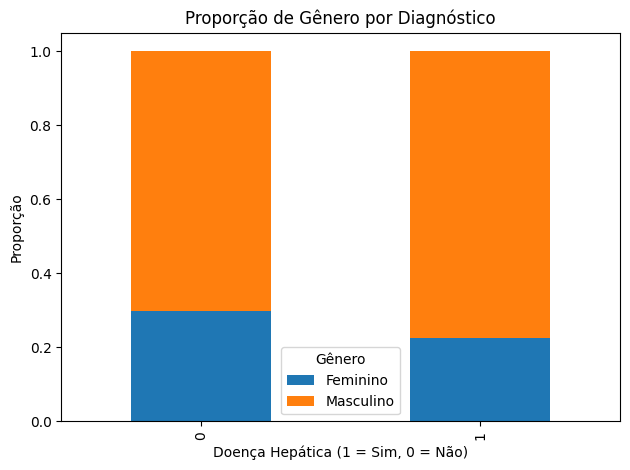

In [139]:
# Pergunta 02: Há diferença na proporção de casos entre gêneros?
# Ferramenta: Gráfico de barras com proporção de homens e mulheres por classe
# Objetivo: Verificar se o sexo está associado a maior probabilidade de diagnóstico.

gender_target_counts = df.groupby(['Target', 'Gender']).size().unstack()
gender_target_counts_norm = gender_target_counts.div(gender_target_counts.sum(axis=1), axis=0)

gender_target_counts_norm.plot(kind='bar', stacked=True)
plt.title('Proporção de Gênero por Diagnóstico')
plt.xlabel('Doença Hepática (1 = Sim, 0 = Não)')
plt.ylabel('Proporção')
plt.legend(['Feminino', 'Masculino'], title='Gênero')
plt.tight_layout()
plt.show()

## Separação modelo de Treino e Teste

In [140]:
X = df.drop(columns='Target')
y = df['Target']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Pré-processamento de dados 02

In [142]:
# Identificar colunas numéricas e categóricas
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

print("Colunas numéricas:", numeric_columns)
print("Colunas categóricas:", categorical_columns)

Colunas numéricas: ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']
Colunas categóricas: []


In [143]:
# Pipeline de pré-processamento para padronização dos dados
# Explicação: Para evitat que atributos com valores grandes (como Alkaline_Phosphotase) dominem a modelagem, foi usado o StandardScaler() para padronizar os dados com média 0 e desvio padrão 1.
preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Aplicar preprocessor apenas nas colunas numéricas (todas, neste caso)
transformer = ColumnTransformer(transformers=[
    ('num', preprocessor, numeric_columns)
])

# Modelagem - Treinamento - Avaliação: Multiplas Árvores de decisão (RandomForestClassifier)

In [103]:
# Pipeline final: transforma os dados com `transformer` e aplica o classificador
final_pipeline = Pipeline(steps=[
    ('preprocessing', transformer),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Treinar o modelo
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Gender',
                                                   'Total_Bilirubin',
                                                   'Direct_Bilirubin',
                                                   'Alkaline_Phosphotase',
                                                   'Alamine_Aminotransferase',
                                                   'Aspartate_Aminotransferase',
                                                   'Total_Protiens', 'Albumin',
                                                   'Albumin_and_Globulin_Ratio'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [107]:
# Fazer previsões
y_pred = final_pipeline.predict(X_test)

In [110]:
# Avaliação com Acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia com Árvore de decisão:", accuracy)

Acurácia com Árvore de decisão: 0.7456140350877193


In [109]:
# Avaliação com relatório de classificacao
print("Avaliação com relatório de classificacao \n", classification_report(y_test, y_pred))

Avaliação com relatório de classificacao 
               precision    recall  f1-score   support

           0       0.50      0.41      0.45        29
           1       0.81      0.86      0.83        85

    accuracy                           0.75       114
   macro avg       0.66      0.64      0.64       114
weighted avg       0.73      0.75      0.74       114



# Modelagem - Treinamento - Avaliação: Árvores de decisão (DecisionTreeClassifier)

In [112]:
# Pipeline final: transforma os dados com `transformer` e aplica o classificador
final_pipeline = Pipeline(steps=[
    ('preprocessing', transformer),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Treinar o modelo
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Gender',
                                                   'Total_Bilirubin',
                                                   'Direct_Bilirubin',
                                                   'Alkaline_Phosphotase',
                                                   'Alamine_Aminotransferase',
                                                   'Aspartate_Aminotransferase',
                                                   'Total_Protiens', 'Albumin',
                                                   'Albumin_and_Globulin_Ratio'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [113]:
# Fazer previsões
y_pred = final_pipeline.predict(X_test)

In [114]:
# Avaliação com Acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia com Árvore de decisão:", accuracy)

Acurácia com Árvore de decisão: 0.5789473684210527


In [115]:
# Avaliação com relatório de classificacao
print("Avaliação com relatório de classificacao \n", classification_report(y_test, y_pred))

Avaliação com relatório de classificacao 
               precision    recall  f1-score   support

           0       0.29      0.45      0.35        29
           1       0.77      0.62      0.69        85

    accuracy                           0.58       114
   macro avg       0.53      0.54      0.52       114
weighted avg       0.65      0.58      0.60       114



# Modelagem - Treinamento - Avaliação: KNN

Text(0, 0.5, 'Mean Error')

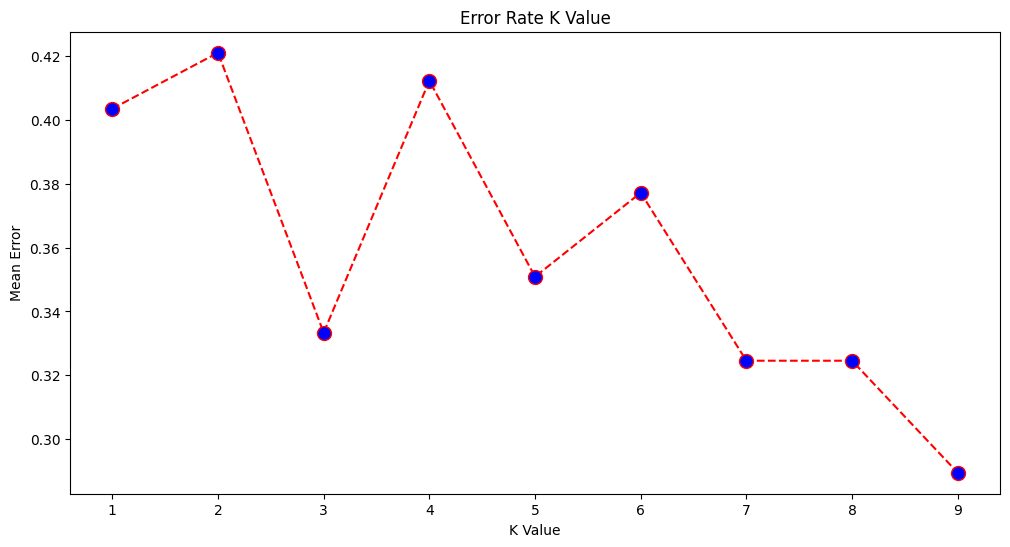

In [146]:
# Funcao para definir o K
error = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)# aqui definimos  o k
    knn.fit(X_train, y_train) #treinando o algoritmo para encontrar o erro
    pred_i = knn.predict(X_test) #armazenando as previsões
    error.append(np.mean(pred_i != y_test)) #armazenando o valor do erro médio na lista de erros


plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [152]:
# Pipeline final: transforma os dados com `transformer` e aplica o classificador
final_pipeline = Pipeline(steps=[
    ('preprocessing', transformer),
    ('classifier', KNeighborsClassifier(n_neighbors=8))
])

# Treinar o modelo
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Gender',
                                                   'Total_Bilirubin',
                                                   'Direct_Bilirubin',
                                                   'Alkaline_Phosphotase',
                                                   'Alamine_Aminotransferase',
                                                   'Aspartate_Aminotransferase',
                                                   'Total_Protiens', 'Albumin',
                                                   'Albumin_and_Globulin_Ratio'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=8))])

In [153]:
# Fazer previsões
y_pred = final_pipeline.predict(X_test)

In [154]:
# Avaliação com Acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia com Árvore de decisão:", accuracy)

Acurácia com Árvore de decisão: 0.6052631578947368


In [155]:
# Avaliação com relatório de classificacao
print("Avaliação com relatório de classificacao \n", classification_report(y_test, y_pred))

Avaliação com relatório de classificacao 
               precision    recall  f1-score   support

           0       0.28      0.34      0.31        29
           1       0.76      0.69      0.72        85

    accuracy                           0.61       114
   macro avg       0.52      0.52      0.52       114
weighted avg       0.63      0.61      0.62       114

